# Energy Use

## Description

Origin: Chicago data portal (https://data.cityofchicago.org/)

Last updated: xx/xx/xxxx

## Packages (Python)

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go

import geopandas as gpd
import geopy as gp
import shapely
import geojson
#import rtree
#import pygeos
#import fiona

In [ ]:
# Preprocessing files
from preprocessing import *

## Chicago Polygon 

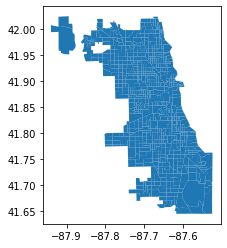

In [ ]:
# Reading file that must be uploaded

chicago = gpd.read_file('chicago.shp')
chicago.plot()

## Data processing

In [ ]:
url = "https://data.cityofchicago.org/resource/jn94-it7m.json"
energy_use = pd.read_json(url)

In [ ]:
energy_use.head()

,location,benchmarking_id,address,chicago_energy_rating,latitude,exempt_from_chicago_energy_rating,community_area,longitude,property_name,data_year,reporting_status,zip_code,number_of_buildings,primary_property_type_epa_calculated,site_eui_kbtu_sq_ft,property_gross_floor_area_epa_calculated_buildings_sq_ft,natural_gas_use_kbtu,year_built,electricity_use_grid_purchase_and_generated_from_onsite_renewable_systems_kbtu,energy_star_score,weather_normalized_site_eui_kbtu_sq_ft,source_eui_kbtu_sq_ft,water_use_kgal,total_ghg_emissions_metric_tons_co2e,ghg_intensity_metric_tons_co2e_sq_ft,district_chilled_water_use_kbtu,district_steam_use_kbtu
0,"{'latitude': '41.70649646', 'needs_recoding': ...",159005,821 E 103rd St,0.0,41.706496,False,PULLMAN,-87.602690,Corliss HS -CPS,2019,Not Submitted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'latitude': '41.886495', 'needs_recoding': Fa...",256568,363 E Wacker Dr,0.0,41.886495,False,Loop,-87.618105,Vista Tower,2019,Not Submitted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'latitude': '41.75582921', 'needs_recoding': ...",100393,7601 S Cicero Ave,NaN,41.755829,True,WEST LAWN,-87.736993,Ford City Mall,2019,Submitted,60652,1.0,Enclosed Mall,144.1,864923.0,11780942.4,1950.0,112895334.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'latitude': '41.75629268', 'needs_recoding': ...",100395,7500 S Pulaski Ave,0.0,41.756293,False,WEST LAWN,-87.722240,Daley,2019,Not Submitted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'latitude': '42.01036185', 'needs_recoding': ...",100984,1604 1610 W SHERWIN AVE,0.0,42.010362,False,ROGERS PARK,-87.668298,1604 1610 W SHERWIN AVE,2019,Not Submitted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
energy_use.describe()

,benchmarking_id,chicago_energy_rating,latitude,longitude,data_year,number_of_buildings,site_eui_kbtu_sq_ft,property_gross_floor_area_epa_calculated_buildings_sq_ft,natural_gas_use_kbtu,year_built,electricity_use_grid_purchase_and_generated_from_onsite_renewable_systems_kbtu,energy_star_score,weather_normalized_site_eui_kbtu_sq_ft,source_eui_kbtu_sq_ft,water_use_kgal,total_ghg_emissions_metric_tons_co2e,ghg_intensity_metric_tons_co2e_sq_ft,district_chilled_water_use_kbtu,district_steam_use_kbtu
count,1000.000000,920.000000,998.000000,998.000000,1000.0,677.000000,720.000000,6.830000e+02,6.490000e+02,683.000000,7.200000e+02,614.00000,434.000000,440.000000,1.040000e+02,395.000000,395.000000,2.200000e+01,9.000000e+00
mean,114422.582000,2.130435,41.887645,-87.651950,2019.0,1.290990,101.764583,3.610282e+05,1.601003e+07,1962.579795,1.972475e+07,60.90228,102.481106,186.392045,4.991416e+05,4416.759494,10.820506,3.301482e+07,2.759796e+07
std,22403.749921,1.559431,0.067753,0.044804,0.0,2.700996,76.035867,6.578861e+05,4.015014e+07,34.498553,5.513759e+07,26.02791,82.153483,166.535880,3.887669e+06,12958.839127,10.133400,7.758904e+07,4.134044e+07
min,100001.000000,0.000000,41.651404,-87.844645,2019.0,1.000000,13.700000,3.845600e+04,5.300000e+03,1884.000000,5.379790e+04,1.00000,14.600000,19.300000,9.000000e-01,66.000000,1.000000,1.558674e+06,8.347135e+05
25%,102279.750000,0.000000,41.868632,-87.666568,2019.0,1.000000,63.075000,6.954300e+04,3.434230e+06,1928.000000,1.592464e+06,43.25000,63.200000,110.600000,1.929650e+03,540.650000,6.200000,7.742332e+06,4.959146e+06
50%,105988.000000,2.500000,41.887967,-87.638730,2019.0,1.000000,86.500000,1.188900e+05,5.877200e+06,1970.000000,3.965548e+06,66.00000,85.150000,146.900000,4.402050e+03,1155.800000,8.400000,1.331004e+07,1.005348e+07
75%,118746.750000,3.500000,41.934738,-87.627286,2019.0,1.000000,111.825000,3.758525e+05,1.221976e+07,1991.500000,1.514584e+07,81.75000,110.100000,205.225000,1.259015e+04,3400.550000,11.950000,2.619136e+07,2.322449e+07
max,256571.000000,4.000000,42.017989,-87.545829,2019.0,57.000000,1122.600000,9.245333e+06,4.730932e+08,2018.000000,9.923283e+08,100.00000,1122.900000,2556.600000,3.787893e+07,185162.100000,151.500000,3.762233e+08,1.306069e+08


In [ ]:
energy_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                                                          Non-Null Count  Dtype   
---  ------                                                                          --------------  -----   
 0   location                                                                        998 non-null    object  
 1   benchmarking_id                                                                 1000 non-null   int64   
 2   address                                                                         1000 non-null   object  
 3   chicago_energy_rating                                                           920 non-null    float64 
 4   latitude                                                                        998 non-null    float64 
 5   exempt_from_chicago_energy_rating                                               1000 non-null   bool    
 6   community

In [ ]:
location_null = energy_use['latitude'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

2


In [ ]:
energy_use.isnull().sum()

location                                                                            2
benchmarking_id                                                                     0
address                                                                             0
chicago_energy_rating                                                              80
latitude                                                                            2
exempt_from_chicago_energy_rating                                                   0
community_area                                                                      2
longitude                                                                           2
property_name                                                                      14
data_year                                                                           0
reporting_status                                                                    0
zip_code                                              

In [ ]:
energy_geo = gpd.GeoDataFrame(energy_use, geometry = gpd.points_from_xy(energy_use.longitude, energy_use.latitude))

Text(0.5, 1.0, 'Energy consumption points in Chicago')

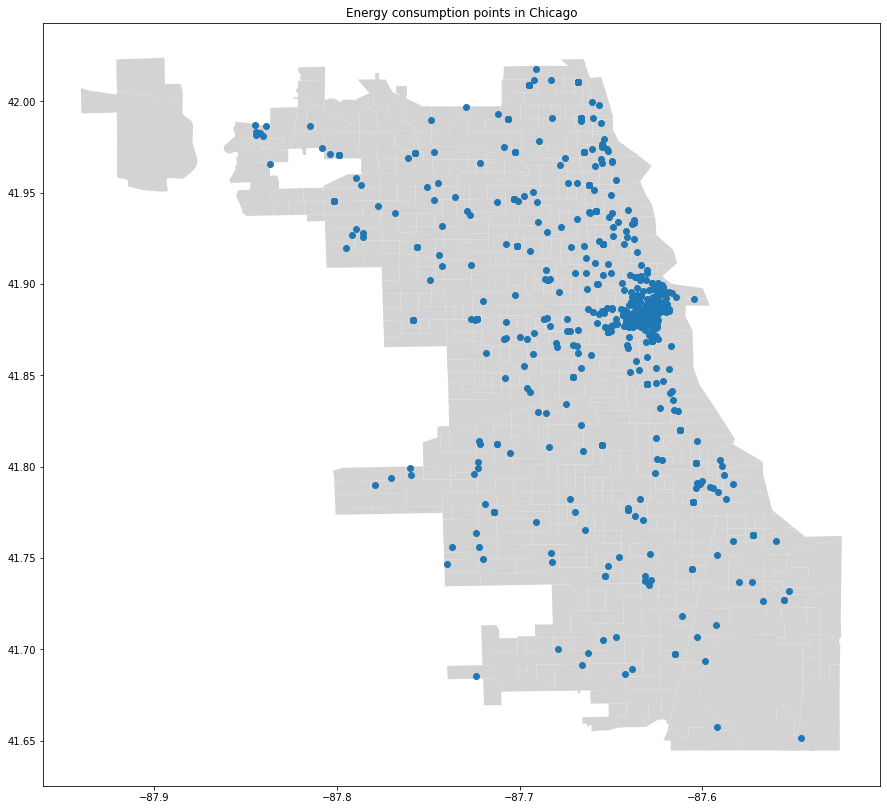

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
energy_geo.plot(ax = ax)
ax.set_title('Energy consumption points in Chicago')